#### Building a Simple Next Word Prediction Model

In [81]:
# Import all the packages
from datasets import load_dataset
import tensorflow as tf
import pandas as pd 
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Input, Dropout
import fasttext
import re
import os

In [2]:
# Loading the Dataset
ds = load_dataset("agentlans/high-quality-english-sentences")
embed = fasttext.load_model('keyboard.bin')
count = 500

In [3]:
DataFrame = pd.DataFrame(data=ds['train']['text'][:count],columns=['Text'])
print("Sample Text Information: ", DataFrame.iloc[0]['Text'])

Sample Text Information:  Soon we dropped into a living forest, where cold-tolerant evergreens and boreal animals still evoke the Canadian heritage of an ecosystem pushed south by glaciers 20,000 years ago.


In [62]:
max_length = 3  # Max sequence length

In [63]:
# This will generate all the Inputs and Outputs
vocab = set()
Data = {'X': [], 'Y' : []}
for i in DataFrame['Text']:
    info = re.sub(r'[!@#$%^&*()\-=_{}[\];:"\'<>,.?/|\\]', '', i)
    info = i.split(' ')
    for x in range(0,len(info)-max_length):
        Data['X'].append(" ".join(info[x:x+max_length]))
        Data['Y'].append(info[x+max_length])
        vocab = set.union(vocab, info[x:x+max_length+1])

In [64]:
vocab_size = vocab.__sizeof__() ## Vocab Size
# Pre-set Config
embedding_dim = 200

In [65]:
Data_embed = {'X':[], 'Y':[]}
for i in range(len(Data['X'])):
    Data_embed['X'].append(np.array([embed.get_word_vector(word)  for word in embed.get_line(Data['X'][i])[0]]))
    Data_embed['Y'].append(embed.get_sentence_vector(Data['Y'][i]).reshape(1, -1))
Data_embed['X'] = np.array(Data_embed['X'])
Data_embed['Y'] = np.array(Data_embed['Y'])

In [75]:
model = Sequential()
model.add(Input(shape=(6, 200)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(embedding_dim, activation='tanh'))

In [76]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 64)             │        67,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 200)            │        20,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,740 (448.20 KB)

 Trainable params: 114,740 (448.20 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer='adagrad', loss='mse', metrics=['mae'])
history = model.fit(Data_embed['X'], Data_embed['Y'], epochs=100, batch_size=32)

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0997 - mae: 0.2568
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0456 - mae: 0.1711
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0258 - mae: 0.1282
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0173 - mae: 0.1047
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0131 - mae: 0.0911
Epoch 6/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0108 - mae: 0.0825
Epoch 7/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0093 - mae: 0.0768
Epoch 8/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083 - mae: 0.0722
Epoch 9/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0075 - mae: 0.0688
Epoch 10/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070 - mae: 0.0665
Epoch 11/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066 - mae: 0.0646
Epoch 12/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0063 - mae: 0.0630
Epoch 13/10

In [83]:
model.save("word.keras")
filesize = os.path.getsize('word.keras')

In [89]:
print(f"Model Size : {(filesize/1024):.2f} KB") 

Model Size : 934.17 KB


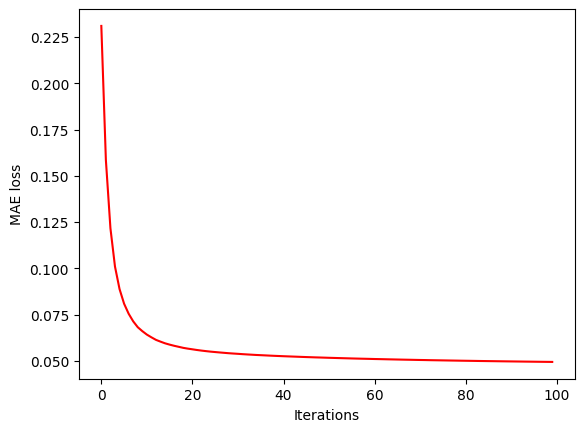

In [103]:
import matplotlib.pyplot as plt
plt.xlabel('Iterations')
plt.ylabel('MAE loss')
plt.plot(history.history['mae'], c='red')
plt.show()